# A simple example of semantic segmentation

The field of deep learning is vast. The sheer number of publications on the subject is enough to make anyone overwheled. In the series "Simple deep learning" we'll be taking a step back. We'll forget about the latest tips and tricks that are pushing the state of the art. Instead, through the use of simple datasets and toy problems, we'll explore the basis of deep learning to give you a better understanding of the big picture.

This post is about semantic segmentation. This is the task of assigning a label to each pixel of an images. It can be seen as a an image classification task, except that instead of classifying the whole image, you're classifying each pixel individually. From this perspective, semantic segmentation is actually very simple. Let's see how we can build a model using Keras to perform semantic segmentation.

This tutorial is posted on my blog and in my github repository.
You can find the github version with all the code at:
The website version is at: 

We're going to use MNIST extended, a toy dataset I created that's excellent for exploring and playing around deep learning models. In this post, we won't look into how the data is generated, for more information on that, you can checkout my post : ....

Let's start by importing a few packages. I've printed the version numbers of the packages we're importing. We'll only be using very simple features, so any version of tensorflow 2 should work, and any reasonably recent versions of numpy and matplotlib should be fine.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Configure background colour of plots. In jupyter notebook dark mode, this is sometimes helpful.
plt.rcParams['figure.facecolor'] = 'white'

print(tf.__version__, matplotlib.__version__, np.__version__, sep='\n')

2.0.0
3.1.1
1.18.2


## Dataset creation

We're going to use the extended MNIST semantic segmentation dataset. This is a dataset I created for exporing image segmentation and object localisation tasks. If you want more details about how this dataset is created, check out my post called "MNIST extended: A simple dataset of image segmentation and object localisation". You if you don't want/need to know how I created the dataset, all you need to know is this:

We need a dataset. Let's use MNIST, a database of handwritten digits and use Keras to download it.

In [378]:
tf.keras.backend.clear_session()
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=array_shape, padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

In [379]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 32)        9

In [380]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.Precision()])

history = model.fit(train_x, train_y, epochs=20,
                    validation_data=(test_x, test_y))

Train on 1000 samples, validate on 100 samples
Epoch 1/20
1000/1000 [==============================] - 10s 10ms/sample - loss: 0.3704 - binary_accuracy: 0.9078 - recall: 0.0534 - precision: 0.0143 - val_loss: 0.1042 - val_binary_accuracy: 0.9785 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/20
1000/1000 [==============================] - 9s 9ms/sample - loss: 0.0684 - binary_accuracy: 0.9803 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0502 - val_binary_accuracy: 0.9785 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/20
1000/1000 [==============================] - 10s 10ms/sample - loss: 0.0405 - binary_accuracy: 0.9803 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0392 - val_binary_accuracy: 0.9785 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/20
1000/1000 [==============================] - 10s 10ms/sample - loss: 0.0329 - binary_accuracy: 0.9803 - recall: 0.0018 - precision: 0.9613 - val_loss: 0.0309 - val_binary_a

In [381]:
test_y_predicted = model.predict(test_x)

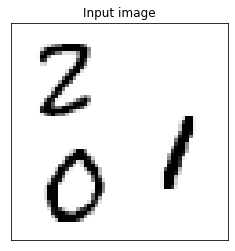

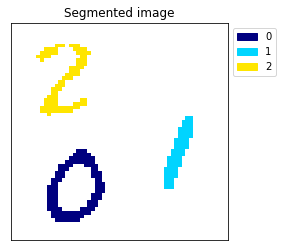

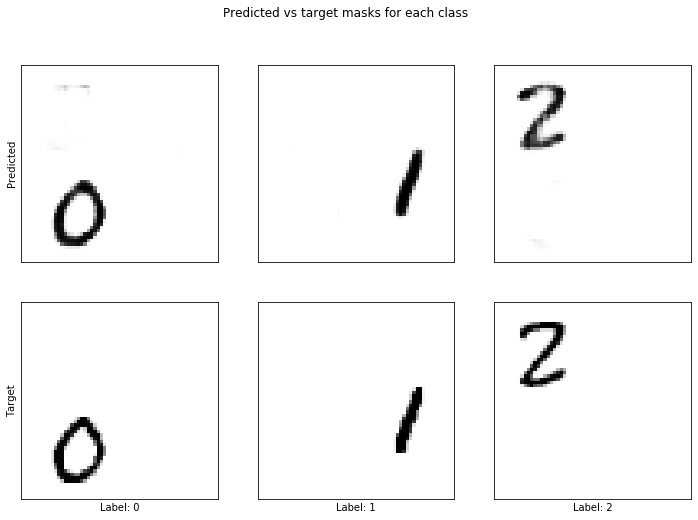

In [472]:
from utils.semantic_segmentation import display_input_image, plot_class_masks, display_segmented_image
plt.rcParams['figure.facecolor'] = 'white'

i = np.random.randint(len(test_y_predicted))

display_input_image(test_x[i])
display_segmented_image(test_y_predicted[i])
plot_class_masks(test_y[i], test_y_predicted[i])